# Exploratory Data Analysis: Air Quality & Pollutant Behavior

This notebook explores air quality data collected using the OpenWeather Air Pollution API for Delhi and Udaipur.

While the AQI index provides a high-level classification, it saturates at level 5 (Very Poor) for severe conditions.
To uncover deeper insights, this analysis focuses primarily on particulate and gaseous pollutant concentrations.

**Why Pollutant-Level Analysis?**

AQI values are capped between 1 and 5, which limits their ability to reflect:

• Severity beyond threshold levels 

• Frequency of extreme pollution events

• Differences between cities under similarly classified AQI conditions

Therefore, this analysis prioritizes:

•	PM2.5 and PM10 (particulates) 

•	CO, NO₂, SO₂, O₃, NH₃ (gaseous pollutants)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("aqi_cleaned_data.csv")

df.head()

,timestamp,city,aqi,pm2_5,pm10,no2,so2,co,o3,nh3,date,hour,day_of_week,month,year,week_number,aqi_category,latest_aqi_delhi,latest_aqi_udaipur
0,2026-01-19 09:54:00,Udaipur,5,92.03,167.37,10.52,2.03,612.39,17.66,2.58,2026-01-19,9,Monday,January,2026,4,Very Poor,NaN,NaN
1,2026-01-19 09:53:59,Delhi,5,425.01,438.95,18.23,4.84,1895.81,14.21,3.28,2026-01-19,9,Monday,January,2026,4,Very Poor,NaN,NaN
2,2026-01-19 09:38:08,Delhi,5,425.01,438.95,18.23,4.84,1895.81,14.21,3.28,2026-01-19,9,Monday,January,2026,4,Very Poor,NaN,NaN
3,2026-01-19 09:38:08,Udaipur,5,92.03,167.37,10.52,2.03,612.39,17.66,2.58,2026-01-19,9,Monday,January,2026,4,Very Poor,NaN,NaN
4,2026-01-18 23:34:36,Udaipur,4,62.22,125.39,15.51,3.25,443.19,39.79,4.52,2026-01-18,23,Sunday,January,2026,3,Poor,NaN,NaN


In [6]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1020 non-null   object 
 1   city                1020 non-null   object 
 2   aqi                 1020 non-null   int64  
 3   pm2_5               1020 non-null   float64
 4   pm10                1020 non-null   float64
 5   no2                 1020 non-null   float64
 6   so2                 1020 non-null   float64
 7   co                  1020 non-null   float64
 8   o3                  1020 non-null   float64
 9   nh3                 1020 non-null   float64
 10  date                1020 non-null   object 
 11  hour                1020 non-null   int64  
 12  day_of_week         1020 non-null   object 
 13  month               1020 non-null   object 
 14  year                1020 non-null   int64  
 15  week_number         1020 non-null   int64  
 16  aqi_ca

,aqi,pm2_5,pm10,no2,so2,co,o3,nh3,hour,year,week_number,latest_aqi_delhi,latest_aqi_udaipur
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,328.0,328.0
mean,4.843137,134.081059,158.748324,11.701931,6.257245,656.724657,93.317284,3.290539,14.691176,2025.392157,32.133333,5.0,5.0
std,0.394891,64.044395,70.077643,9.627926,4.095872,340.585662,39.214543,3.400299,5.593853,0.488471,23.823069,0.0,0.0
min,3.000000,26.120000,45.470000,1.590000,1.240000,175.510000,13.680000,0.000000,0.000000,2025.000000,1.000000,5.0,5.0
25%,5.000000,83.677500,101.110000,3.480000,3.687500,403.470000,58.850000,0.680000,12.000000,2025.000000,3.000000,5.0,5.0
50%,5.000000,110.620000,128.605000,9.530000,5.230000,553.970000,92.290000,2.280000,14.000000,2025.000000,51.000000,5.0,5.0
75%,5.000000,183.290000,208.960000,17.360000,7.330000,833.955000,130.760000,4.780000,19.000000,2026.000000,51.000000,5.0,5.0
max,5.000000,425.010000,438.950000,54.780000,32.220000,2167.210000,167.080000,17.660000,23.000000,2026.000000,52.000000,5.0,5.0


# Particulate Matter (PM) 
it represents solid and liquid particles that penetrate lungs and bloodstream.


# Gaseous Pollutants
it affect respiratory and cardiovascular systems differently and often explain AQI saturation.

In [13]:
particulate=["pm2_5","pm10"]
gaseous=["no2","so2","co","o3","nh3"]

# Particulate Matter Distributions

Boxplots provide a robust statistical comparison by showing:

• Median concentration

• Interquartile range (IQR)

• Outliers (extreme pollution events)

**Contextualizing with WHO Guidelines are mentioned as red line for reference**  

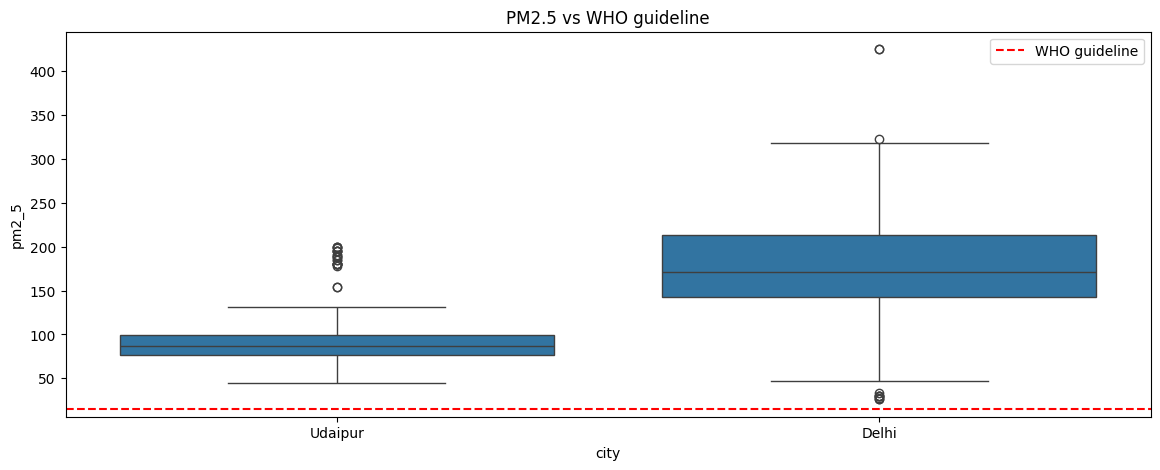

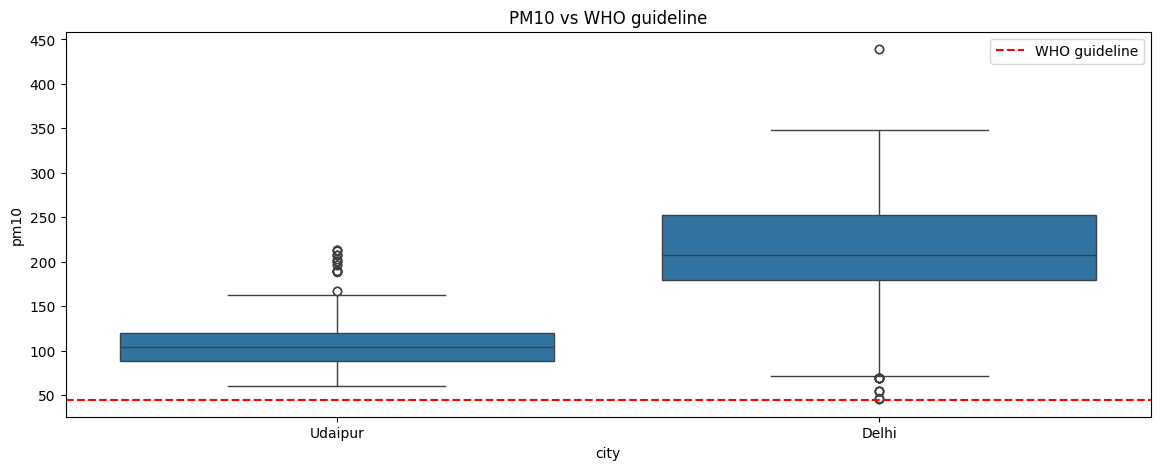

'plt.figure(figsize=(14,5))\nsns.boxplot(data=df, x="city", y="pm10")\nplt.title("PM10 distribution by city")\nplt.show()'

In [37]:
"""plt.figure(figsize=(14,5))
sns.boxplot(data=df, x="city", y="pm2_5")
plt.title("PM2.5 distribution by city")
plt.show()"""

plt.figure(figsize=(14,5))
sns.boxplot(data=df, x="city", y="pm2_5")
plt.axhline(15, color="red", linestyle="--", label="WHO guideline")
plt.legend()
plt.title("PM2.5 vs WHO guideline")
plt.show()

plt.figure(figsize=(14,5))
sns.boxplot(data=df, x="city", y="pm10")
plt.axhline(45, color="red", linestyle="--", label="WHO guideline")
plt.legend()
plt.title("PM10 vs WHO guideline")
plt.show()

"""plt.figure(figsize=(14,5))
sns.boxplot(data=df, x="city", y="pm10")
plt.title("PM10 distribution by city")
plt.show()"""

# Observation

• Delhi consistently shows higher medians and wider IQRs

• The number and magnitude of outliers are significantly higher for Delhi

• This indicates both higher typical exposure and greater variability

# Gaseous Pollutant Distributions

This section explores gaseous pollutants which often exhibit:

• Episodic spikes

• Different formation mechanisms

• High temporal variability

Each gas is analyzed city-wise to ensure valid comparisons.

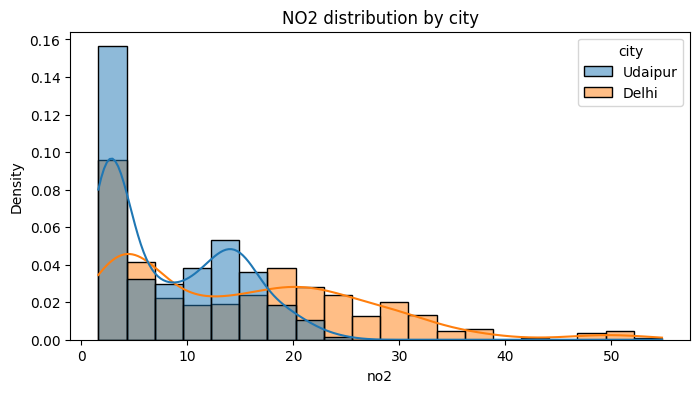

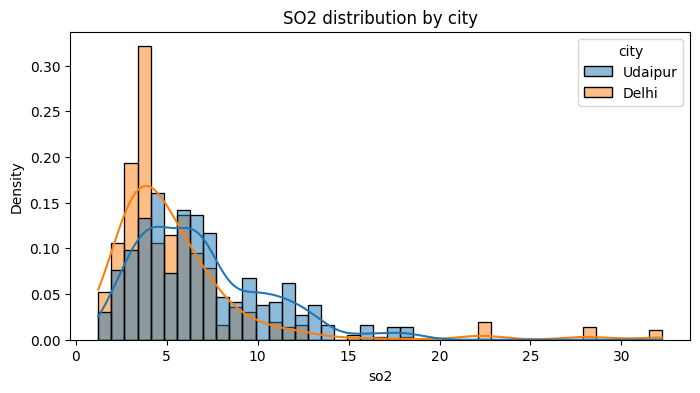

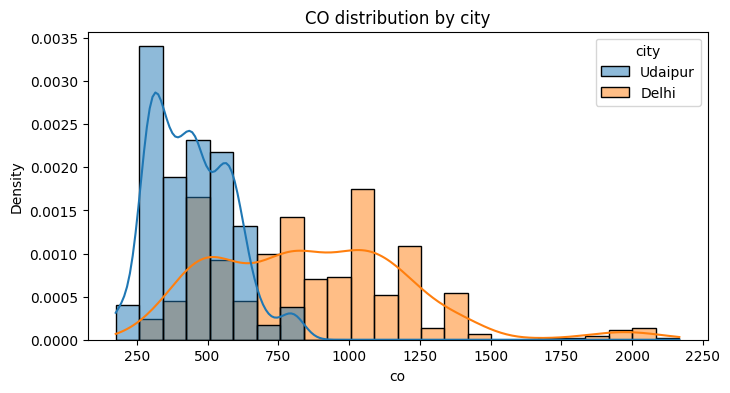

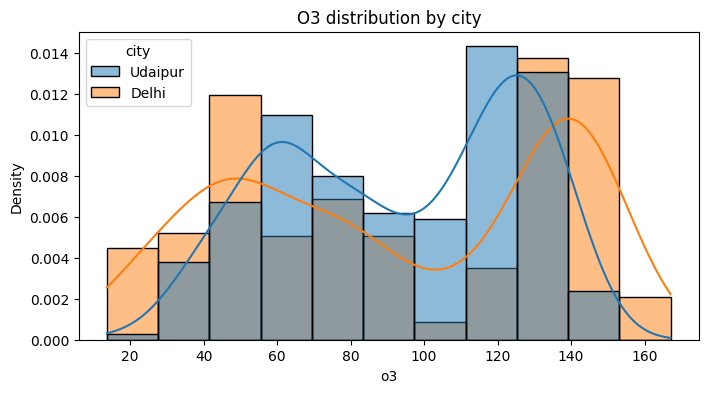

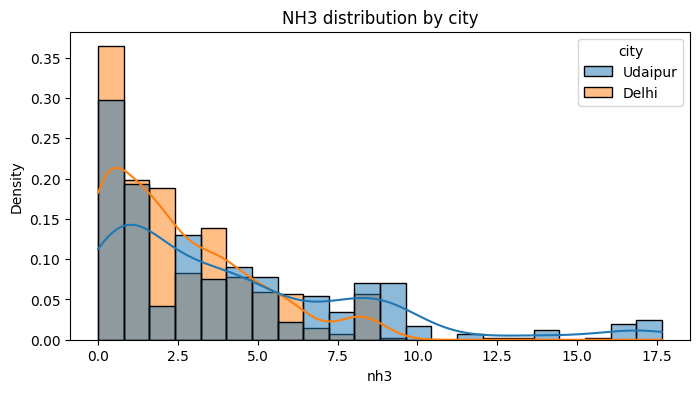

In [17]:
for gas in gaseous:
    plt.figure(figsize=(8,4))
    sns.histplot(
        data=df,
        x=gas,
        hue="city",
        kde=True,
        stat="density",
        common_norm=False
    )
    plt.title(f"{gas.upper()} distribution by city")
    plt.show()

# Observation

• CO and NO₂ show pronounced right-skewness in Delhi

• SO₂ and NH₃ remain relatively low but still show city-level variance

• O₃ displays a distinct distribution pattern, reflecting its photochemical nature

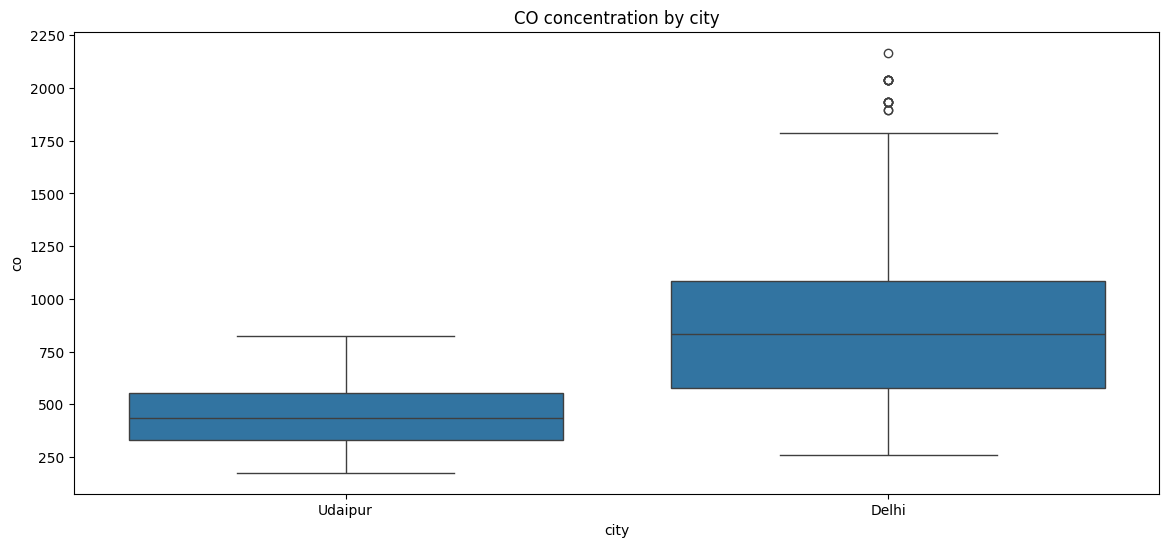

In [35]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="city", y="co")
plt.title("CO concentration by city")
plt.show()

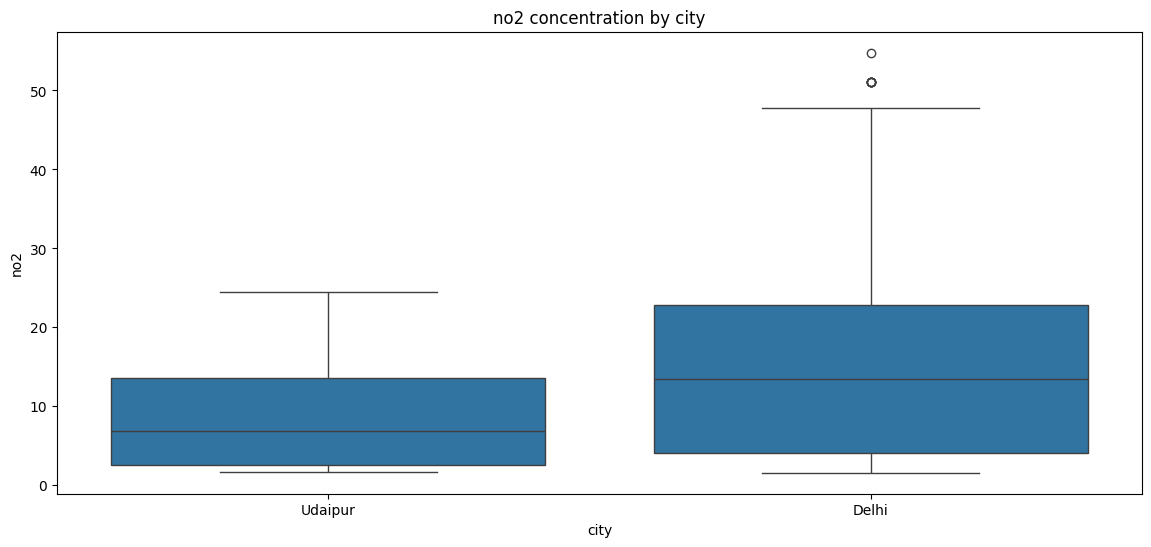

In [36]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="city", y="no2")
plt.title("no2 concentration by city")
plt.show()

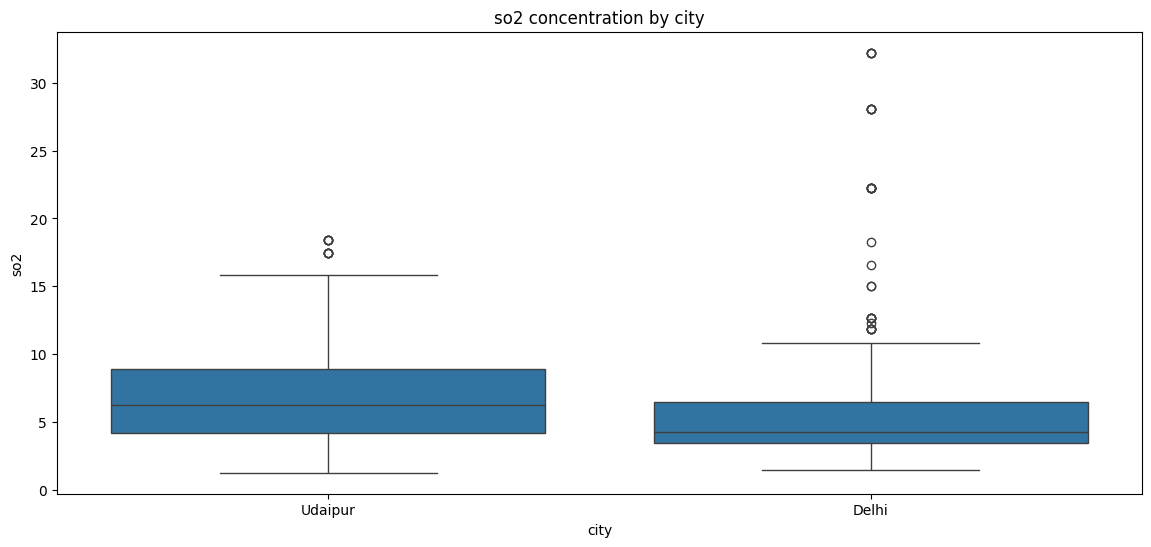

In [20]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="city", y="so2")
plt.title("so2 concentration by city")
plt.show()

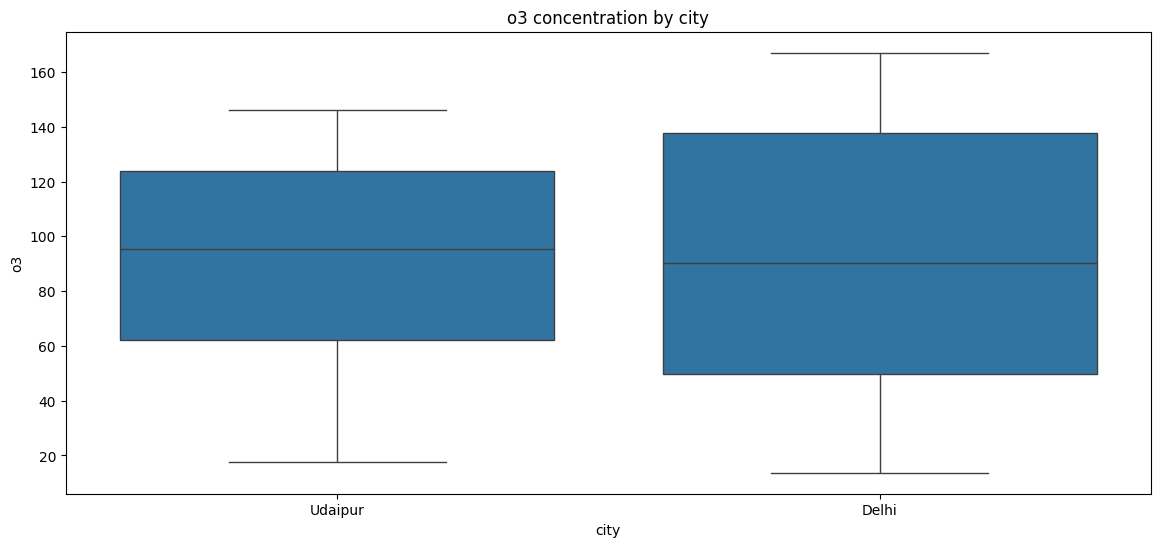

In [21]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="city", y="o3")
plt.title("o3 concentration by city")
plt.show()

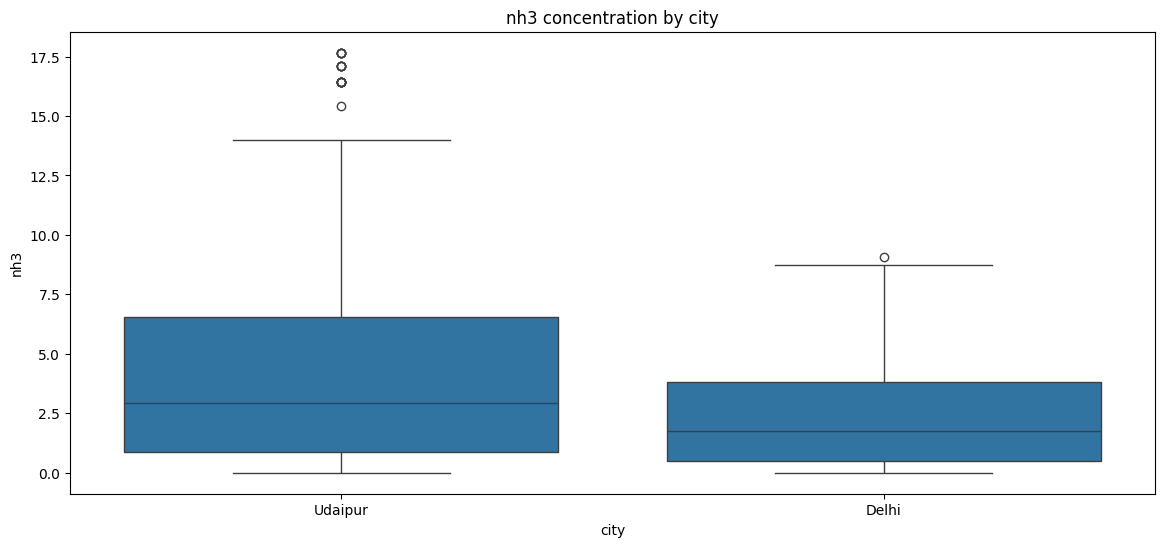

In [22]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="city", y="nh3")
plt.title("nh3 concentration by city")
plt.show()

# Log-Scale Analysis for Combustion Gases

Certain pollutants (especially CO) span multiple orders of magnitude.

Log-scale visualizations help:

• Reveal hidden structure

• Prevent domination by extreme values

• Enable fairer city-to-city comparison

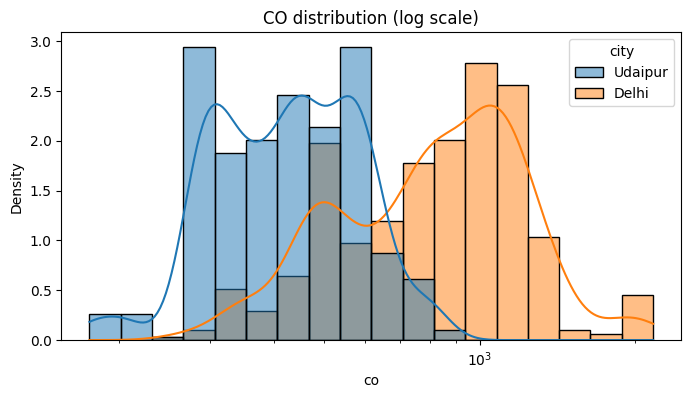

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x="co",
    hue="city",
    kde=True,
    stat="density",
    common_norm=False,
    log_scale=True
)
plt.title("CO distribution (log scale)")
plt.show()

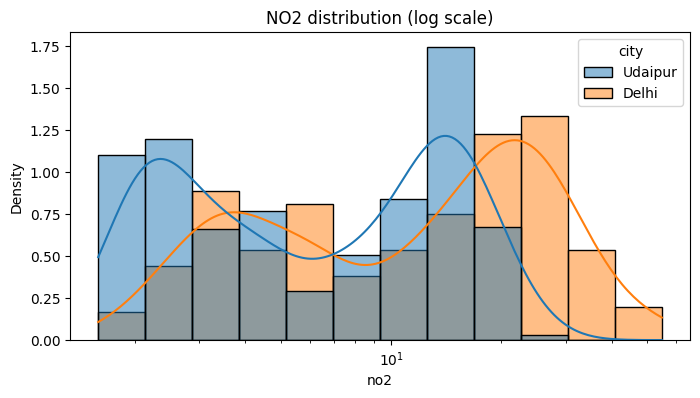

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x="no2",
    hue="city",
    kde=True,
    stat="density",
    common_norm=False,
    log_scale=True
)
plt.title("NO2 distribution (log scale)")
plt.show()

# Diurnal (Hourly) Behavior of Gaseous Pollutants

Air pollution is not static.
This section examines hourly average concentrations to identify temporal patterns.



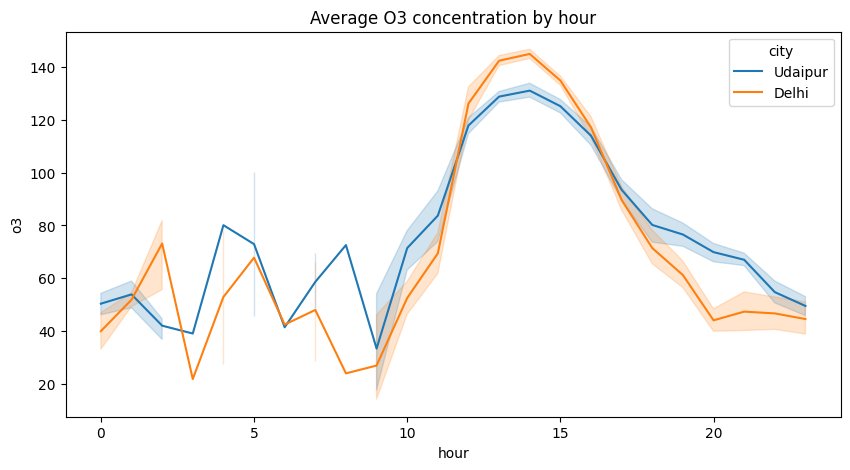

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="hour", y="o3", hue="city", estimator="mean")
plt.title("Average O3 concentration by hour")
plt.show()

# Key Patterns Observed

•	O₃ peaks around midday, consistent with sunlight-driven photochemical reactions
	
•	Udaipur exhibits flatter diurnal curves compared to Delhi

# Conclusion

This exploratory analysis highlights the limitations of relying solely on aggregated air quality indices such as AQI. While AQI provides a convenient high-level summary, it saturates at upper levels and fails to capture the true intensity, variability, and composition of air pollution.

By directly analyzing particulate matter (PM2.5, PM10) and gaseous pollutants (CO, NO₂, SO₂, O₃, NH₃), this study reveals meaningful differences in pollution profiles that are not apparent from AQI values alone. Distributional analysis shows heavier right-tail behavior in particulate concentrations—particularly in urban environments—indicating frequent extreme exposure events. Temporal patterns further demonstrate how pollutant levels fluctuate across hours and days, emphasizing the dynamic nature of air quality.

This pollutant-level approach provides deeper insight into:

•	**Human exposure risk, where extreme concentrations matter more than averaged indices**

•	**Urban–regional contrasts, even when AQI categories appear identical**

•	**Environmental monitoring, by identifying dominant pollutants driving poor air quality**

Overall, this analysis underscores the necessity of granular, data-driven pollutant assessment for public health evaluation, environmental policy formulation, and evidence-based decision-making. Moving beyond AQI enables a more truthful representation of air quality conditions and supports more effective interventions.